# Imports

In [51]:
using Pkg
using Revise
using Plots

Pkg.activate("../")
using BinodalPE

 Activating environment at `/mnt/c/Users/sfrie/Documents/Code/julia/BinodalPE.jl/Project.toml`


# Examples

## Symmetric Coacervate

In [52]:
?SymmetricCoacervate

search: SymmetricCoacervate AsymmetricCoacervate AsymmetricCoacervateModel



```
SymmetricCoacervate{TC <: AbstractChainStructure} <: AbstractModel{TC}
```

A coacervate model with a symmetric treatment of oppositely charged polyions and small salt ions.


In [53]:
model = SymmetricCoacervate(structure = GaussianCoil, np = 100, sig = 0.25, omega = [1, 1])

SymmetricCoacervate{GaussianCoil}(bulk = [0.0, 0.0])

In [55]:
phi = [0.01, 0.025]

@time ftotal(phi, model)

  0.000019 seconds (10 allocations: 256 bytes)


-0.1017901482330647

In [56]:
@time mutotal(phi, model)

  0.000024 seconds (15 allocations: 912 bytes)


2-element Array{Float64,1}:
 -0.6656002270678112
 -2.9963284857396184

Hessian matrix for spinodal

In [10]:
@time f2total(phi, model)

  0.000021 seconds (14 allocations: 1.094 KiB)


2×2 Array{Float64,2}:
 -4.27424  -3.03653
 -3.03653  36.4701

Example solution for a single binodal state:

In [57]:
set_bulk!(model, [0.01, 0.072])
init = [0.0005, 0.0725, 0.04056618971, 0.0725, 0.06]

res = bndlsolve(init, model; iterations = 50, ftol = 1e-10, show_trace = true)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     2.137255e-02              NaN
     1     8.784988e-03     3.568122e+00
     2     2.164265e-03     1.042857e+00
     3     5.808519e-04     4.173605e-01
     4     5.729038e-05     1.050467e-01
     5     1.311902e-05     1.594545e-01
     6     5.933710e-07     3.427782e-02
     7     1.828610e-09     2.090991e-03
     8     1.489173e-14     5.844037e-06


BinodalResults:
  x = [0.006018056178356338, 0.07188967183864409, 0.017558300725491544, 0.07220941868076813, 0.34504847842390507]
  steps = 8
  objective = 1.4892e-14
  converged = true


In [14]:
res.state

BinodalState:
  Bulk  = [0.01, 0.072]
  Sup   = [0.006018056178356338, 0.07188967183864409]
  Dense = [0.017558300725491544, 0.07220941868076813]
  ν = 0.34504847842390507

Solving for a full binodal diagram:

In [16]:
# Contains the initial guesses in the binodal variable format for this model
init = [0.0005, 0.0725, 0.04056618971, 0.0725, 0.06]

bndl = BinodalData()
salt = collect(range(0.0725, 1e-3; length = 15))
for ps in salt
    set_bulk!(model, [0.01, ps])
    
    res = bndlsolve(init, model; iterations = 50, ftol = 1e-10)
    init = res.x
    add_state!(bndl, res.state)
end

A plot recipe is exported to plot an entire `BinodalData` object at once

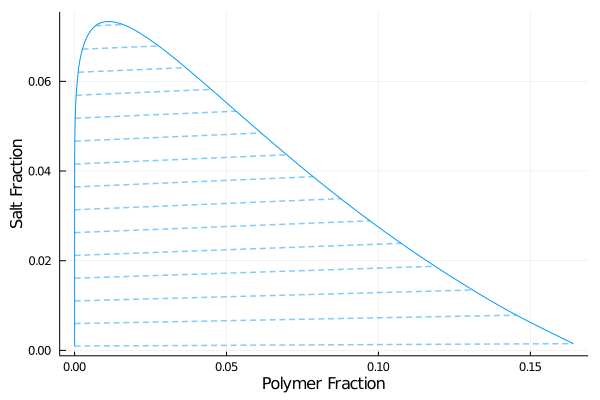

In [17]:
sort!(bndl, 2)

fig = plot(xlabel = "Polymer Fraction", ylabel = "Salt Fraction")
plot!(fig, bndl, tie = true, interp = true)

## Asymmetric Coacervate

In [43]:
?AsymmetricCoacervate

search: AsymmetricCoacervate AsymmetricCoacervateModel



```
AsymmetricCoacervate{TC <: AbstractChainStructure} <: AbstractModel{TC}
```

A coacervate model with asymmetric treatment of oppositely charged polyions and small salt ions.


In [44]:
model = AsymmetricCoacervate(structure = AdaptiveChain, # RGF formalism for adaptive chain structure factor
    omega = [5, 5, 1, 1], # Monomer volumes
    sig = [0.5, 0.5], # Charge density
    chi = [0.5, 0.5, 0.0] # Flory-Huggins parameters
)

AsymmetricCoacervate{AdaptiveChain}(bulk = [0.0, 0.0, 0.0, 0.0])

Solve for the adaptive persitence lengths of the chain self-consistently (RGF formalism implementation).

In [45]:
phi = [0.01, 0.01, 0.025, 0.025]

varsolve(phi, model)

2-element Array{Float64,1}:
 2.515606715795922
 2.515606715795922

In [46]:
@time ftotal(phi, model)

  0.001532 seconds (511 allocations: 72.906 KiB)


-0.20437562138734866

In [47]:
# You can get the chemical potential vector
@time mutotal(phi, model)

  0.002671 seconds (520 allocations: 140.203 KiB)


4-element Array{Float64,1}:
 -0.44298872053783295
 -0.44298872053783295
 -3.0395317271997015
 -3.0395317271997015

In [48]:
# And you can get the hessian if you want a spinodal
@time f2total(phi, model)

  0.007664 seconds (664 allocations: 465.719 KiB)


4×4 Array{Float64,2}:
  0.212184   -0.0603015   0.199619   0.199619
 -0.0603015   0.212184    0.199619   0.199619
  0.199619    0.199619   37.8077    -2.19231
  0.199619    0.199619   -2.19231   37.8077

Solution of a binodal state:

In [49]:
set_bulk!(model, [0.0075, 0.0075, 0.01, 0.01])

init = [
    1e-5, 1e-5, 0.01, 0.01,
    0.05, 0.05, 0.01, 0.01,
    0.06, 0.0
]

res = bndlsolve(init, model; iterations = 50, ftol = 1e-10, show_trace = true)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     2.416583e-02              NaN
     1     4.722144e-03     3.372125e+00
     2     6.826045e-04     4.545888e-01
     3     2.382394e-05     9.532749e-02
     4     3.222909e-08     3.677370e-03
     5     5.909769e-14     5.022539e-06


BinodalResults:
  x = [8.34150552833139e-5, 8.341505528330945e-5, 0.0099663811332235, 0.0099663811332235, 0.05499315061202194, 0.05499315061202196, 0.010215283168078482, 0.010215283168078482, 0.135068669873891, 1.5223172014775818e-16]
  steps = 5
  objective = 5.9098e-14
  converged = true


In [50]:
# An organized 10 vector from a BinodalState, in the format taken as input for bndlsolve
bndlsolvex(res.state, model)

10-element Array{Float64,1}:
 8.34150552833139e-5
 8.341505528330945e-5
 0.0099663811332235
 0.0099663811332235
 0.05499315061202194
 0.05499315061202196
 0.010215283168078482
 0.010215283168078482
 0.135068669873891
 1.5223172014775818e-16

## Association Coacervate

In [32]:
?AssociationCoacervate

search: AssociationCoacervate



```
AssociationCoacervate{TC <: AbstractChainStucture} <: AbstractModel{TC}
```

A coacervate model with treament of reversible binding  for strongly dissociating polyelectrolytes.

At a given composition, the extent of each reaction is determined with the `association_solve` method. These reversible reactions represent:

1. Cation binding on the polyanions
2. Anion binding on the polycations
3. Formation of inter-chain ion-pairs between the polyions

References:

  * Salehi, A.; Larson, R. G. Macromolecules 2016, 49 (24), 9706–9719.
  * Friedowitz, S.; Salehi, A.; Larson, R. G.; Qin, J. J. Chem. Phys. 2018, 149 (16), 163335.

]


One of the more neat parts of this code is that we can differentiate this model's free energy by automatic differentiation, without using finite difference techniques. This can't be done symbolically because of the iterative LMA solutions requires to evaluate the free energy.

This allows us to determine the chemical potential of the model efficiently numerically for equating the chemical potentials between coexisting phases.

In [34]:
model = AssociationCoacervate(structure = GaussianCoil,
    omega = [5, 5, 1, 1], # Monomer volumes
    chi = [0.5, 0.5, 0.0], # Flory-Huggins parameters
    dg = [-3, -3, -3] # Binding energies for each reaction
)

AssociationCoacervate{GaussianCoil}(bulk = [0.0, 0.0, 0.0, 0.0])

In [36]:
phi = [1e-4, 1e-4, 0.02, 0.02]

@time varsolve(phi, model)

  0.000423 seconds (94 allocations: 9.688 KiB)


4-element Array{Float64,1}:
 0.8535309975842477
 0.8535309975842478
 0.004724430699075182
 0.004724430699075182

In [37]:
@time mutotal(phi, model)

  5.367396 seconds (20.31 M allocations: 955.577 MiB, 6.73% gc time)


4-element Array{Float64,1}:
 -0.6891505022477159
 -0.689150502247716
 -3.2380649830095676
 -3.2380649830095676

Depending on the hardware on your machine, first compilation time may be quite slow for this model.

In [42]:
set_bulk!(model, [0.01, 0.01, 0.02, 0.02])

init = [0.001, 0.001, 0.02, 0.02, 0.12, 0.12, 0.02, 0.02, 0.08, 0]

# An instance of BinodalResults is returned
res = bndlsolve(init, model; iterations = 50, ftol = 1e-10, show_trace = true)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     3.868483e-01              NaN
     1     4.364350e-03     4.723236e-01
     2     4.409635e-02     3.140185e-16
     3     4.409635e-02     0.000000e+00
     4     4.409635e-02     0.000000e+00
     5     2.974957e-02     1.275549e-15
     6     1.211678e-02     8.881784e-16
     7     4.512276e-03     2.028997e+00
     8     1.800825e-03     1.124057e+00
     9     1.347695e-03     7.931100e-01
    10     7.993381e-04     2.148729e+00
    11     3.738771e-04     7.964688e-01
    12     2.017806e-04     1.083195e+00
    13     3.158413e-06     3.701636e-02
    14     8.792230e-10     5.581483e-04
    15     5.479392e-16     1.529441e-07


BinodalResults:
  x = [3.584306580711433e-6, 3.5843065807098283e-6, 0.01920482649033495, 0.01920482649033495, 0.09370953511228927, 0.09370953511228927, 0.02665874718190116, 0.02665874718190116, 0.10667855784469886, 2.5606852556930075e-15]
  steps = 15
  objective = 5.4794e-16
  converged = true
